# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

# Dictionary for party names and colors
parties_w_color = {
    "Socialdemokratiet" : "#B32722",
    "Radikale Venstre" : "#713280",
    "Det Konservative Folkeparti" : "#9EBA27",
    "Nye Borgerlige" : "#054F5C", 
    "Socialistisk Folkeparti" : "#DC0878", 
    "Liberal Alliance" : "#20C6CF",
    "Kristendemokraterne" : "#BABABA", 
    "Moderaterne" : "#6C39E5",
    "Dansk Folkeparti" : "#F3CD41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti" : "#00E66A", 
    "Venstre" : "#016697",
    "Danmarksdemokraterne" : "#89C3FF", 
    "Enhedslisten" : "#ED8019", 
    "Alternativet" : "#2B8F39",
    "Løsgænger" : "#cdcdcd"
}

# Read data and view top 10 lines
alldata = pd.read_excel("alldata.xlsx")

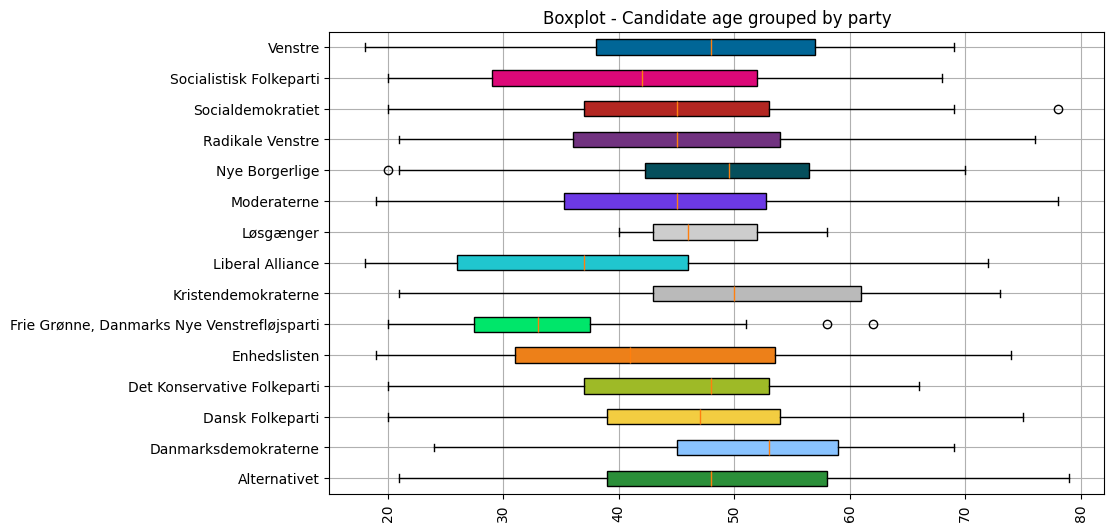

In [54]:
# Candidate age analysis

# Removing candidates without valid age (NaN eller 0)
alldata_clean = alldata[alldata['alder'] > 0]

# getting party names
sorted_parties = sorted(alldata_clean['parti'].unique())

# making list of data grouped by party
data_by_party = [alldata_clean[alldata_clean['parti'] == parti]['alder'].dropna() for parti in sorted_parties]

# Plotting data
plt.figure(figsize=(10,6))
box = plt.boxplot(data_by_party, patch_artist=True, tick_labels=sorted_parties, vert=False)

for patch, party in zip(box['boxes'], sorted_parties):
    color = parties_w_color.get(party, "#111111")
    patch.set_facecolor(parties_w_color[party])

plt.title('Boxplot - Candidate age grouped by party')
plt.suptitle('')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Analysis of candidate age distribution by party

The boxplot highlights clear differences in the age profiles of candidates across the political parties:

- **Youngest Candidates**: *Liberal Alliance* and *Frie Grønne* have notably younger candidates, with median ages around or below 30 years, and narrower age distributions, reflecting a youthful candidate base.

- **Oldest Candidates**: Parties like *Kristendemokraterne* and *Danmarksdemokraterne* present higher median ages, typically above 50 years, indicating that their candidate bases tend toward an older demographic.

- **Wide Age Range**: *Socialistisk Folkeparti*, *Enhedslisten*, and *Liberal Alliance* display the broadest age distributions. These parties include candidates from a wide spectrum of ages, reflecting significant internal demographic diversity.

- **Outliers**: The presence of age outliers (e.g., a significantly older candidate in *Frie Grønne* and *Socialdemokratiet*) emphasizes individual cases where candidates deviate notably from their party’s general demographic.

In [55]:
# Most 'confident' candidates analysis

# Define columns explicitly
candidate_info_cols = ['navn', 'parti', 'storkreds', 'alder']
question_cols = list(alldata.columns[:])  # All columns initially

# Remove candidate information columns
for col in candidate_info_cols:
    question_cols.remove(col)

# Count extreme answers (-2 or 2) per candidate
alldata['extreme_count'] = alldata[question_cols].apply(lambda row: sum(row.isin([-2, 2])), axis=1)

# Calculate the proportion of extreme answers
alldata['extreme_ratio'] = alldata['extreme_count'] / len(question_cols)

# Top 10 most confident candidates
most_confident_candidates = alldata[['navn', 'parti', 'extreme_ratio']].sort_values(by='extreme_ratio', ascending=False).head(10)

print(most_confident_candidates)

                    navn                                        parti  \
505         Sarah Nørris                                 Enhedslisten   
88         Søren Vanting                  Det Konservative Folkeparti   
559  Kim Andkjær Doberck                               Nye Borgerlige   
44     Mohamed Abdikarim  Frie Grønne, Danmarks Nye Venstrefløjsparti   
152           Rashid Ali  Frie Grønne, Danmarks Nye Venstrefløjsparti   
503          Jan Filbært                                 Enhedslisten   
437  Lone Vase Langballe                             Dansk Folkeparti   
284           John Bjerg                               Nye Borgerlige   
359       Frank Sørensen                             Dansk Folkeparti   
151     Elise Bjerkrheim  Frie Grønne, Danmarks Nye Venstrefløjsparti   

     extreme_ratio  
505       1.000000  
88        1.000000  
559       0.897959  
44        0.877551  
152       0.877551  
503       0.857143  
437       0.857143  
284       0.857143  
359    

### Most "confident" Candidates Analysis

The table above provides an overview of the 10 most "confident" candidates—those who answered primarily at the extremes of the scale (-2 or 2). The most extreme candidate is Sarah Nørris from Enhedslisten, who gave extreme answers 96% of the time, corresponding to 49 out of 51 questions. Closely following her is Søren Vanting from Det Konservative Folkeparti, also at 96%, with the same 49 extreme answers. Notably, the party most frequently represented among the most "confident" candidates is Frie Grønne, with three candidates.

Comparing the highest-ranking candidate, Sarah Nørris (96%), with the lowest-ranking candidate on the top 10 list, Elise Bjerkrheim (82%), there is a 14 percentage point difference. This means Elise Bjerkrheim answered approximately 42 out of 51 questions in an extreme manner—7 fewer than Sarah Nørris. This indicates notable variation even among the most "confident" candidates.

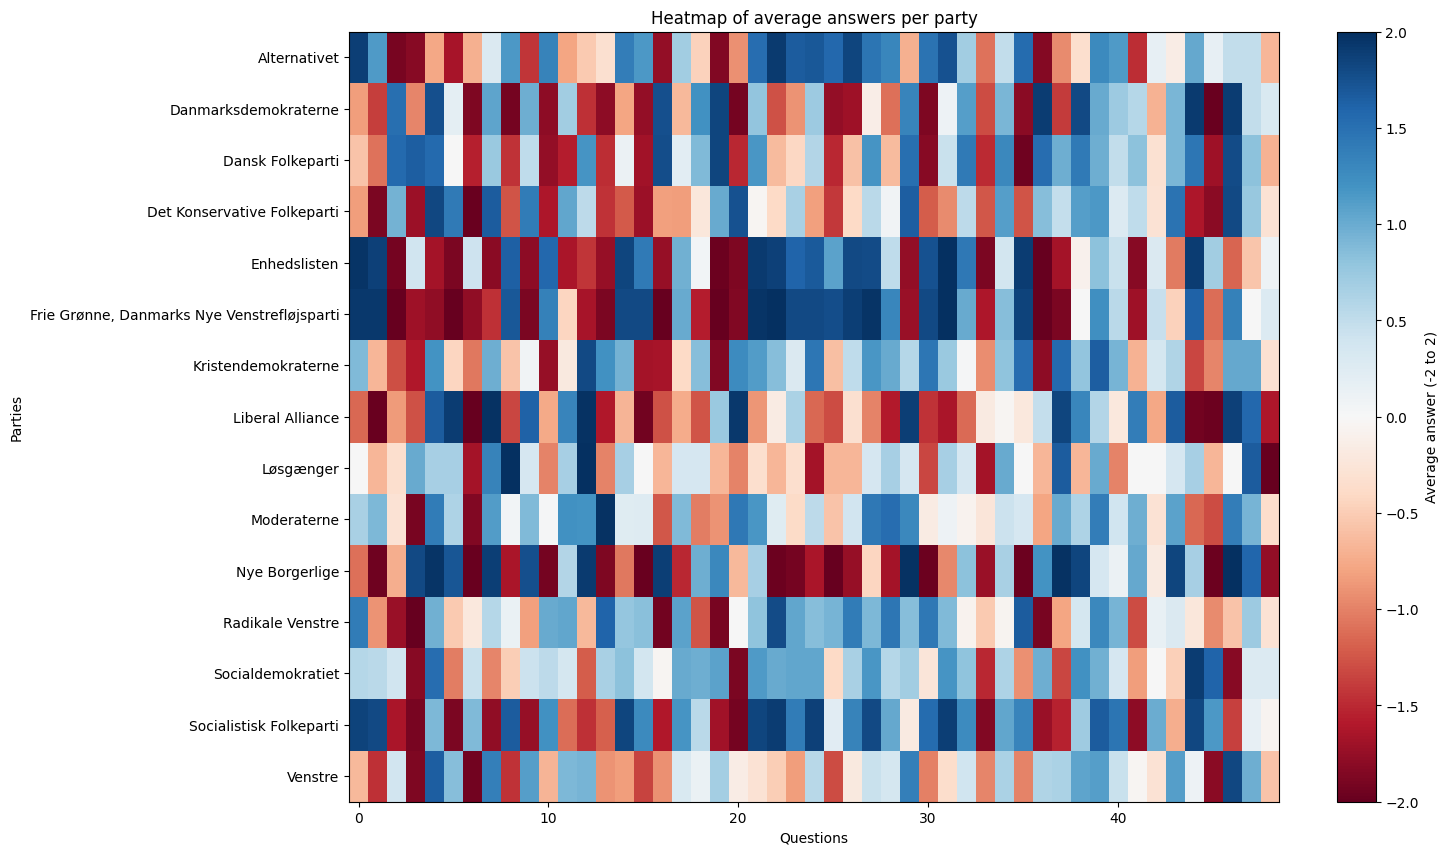

In [62]:
# Inter party analysis

# calculating an average of each partys answer per question
party_means = alldata.groupby('parti')[question_cols].mean()
party_means.head()

# visualizing results in heat map to find areas with noticable differences between parties
plt.figure(figsize=(15,10))
plt.imshow(party_means, cmap='RdBu', aspect='auto', vmin=-2, vmax=2)
plt.colorbar(label='Average answer (-2 to 2)')

plt.yticks(ticks=np.arange(len(party_means.index)), labels=party_means.index)

plt.title('Heatmap of average answers per party')
plt.xlabel('Questions')
plt.ylabel('Parties')
plt.show()

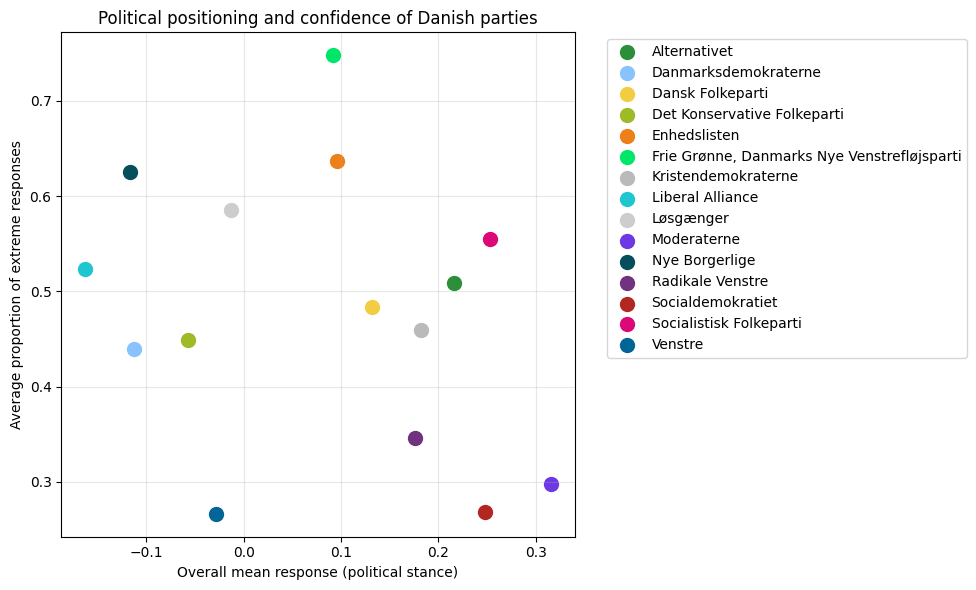

In [58]:
# Calculate mean response per party (overall political stance)
party_overall_mean = alldata.groupby('parti')[question_cols].mean().mean(axis=1)

# Calculate the proportion of extreme responses per party
party_extreme_ratio = alldata.groupby('parti')[question_cols].apply(
    lambda x: np.mean(x.isin([-2, 2]).mean(axis=1))
)

# Visualize clearly in a scatter plot
plt.figure(figsize=(10,6))

for parti in party_overall_mean.index:
    plt.scatter(party_overall_mean[parti], party_extreme_ratio[parti], color=parties_w_color.get(parti, "#555555"), label=parti, s=100)

plt.xlabel('Overall mean response (political stance)')
plt.ylabel('Average proportion of extreme responses')
plt.title('Political positioning and confidence of Danish parties')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This scatter plot visualizes Danish political parties based on two dimensions:

- **Horizontal axis** ("Overall mean response"):  
  Shows the average political stance.  
  - Left: more negative or critical average responses.  
  - Right: more positive or supportive average responses.

- **Vertical axis** ("Average proportion of extreme responses"):  
  Indicates how frequently candidates from each party gave extreme responses (-2 or 2).  
  - Higher: candidates often choose extreme answers, indicating strong or clear opinions.  
  - Lower: candidates tend to choose moderate answers, indicating more nuanced opinions.

Each dot represents a party's average stance and confidence level across all questions.


### Analysis of inter-party differences 

**Heatmap:**  
The heatmap highlights specific areas of significant political differences between parties. Notably, left-wing parties (**Alternativet**, **Enhedslisten**) show distinctly different responses compared to right-wing parties (**Dansk Folkeparti**, **Nye Borgerlige**), visible in sharp color transitions from blue (agree) to red (disagree).

**Scatterplot:**  
The scatterplot indicates that parties such as **Frie Grønne** and **Enhedslisten** frequently choose extreme responses ("strongly agree"/"strongly disagree"), demonstrating clearer political stances. In contrast, parties like **Venstre** and **Socialdemokratiet** are more moderate, rarely opting for extremes, reflecting more nuanced positions.

Overall, these analyses clearly illustrate substantial ideological differences between the parties regarding both specific political issues and their tendency toward extreme or moderate responses.


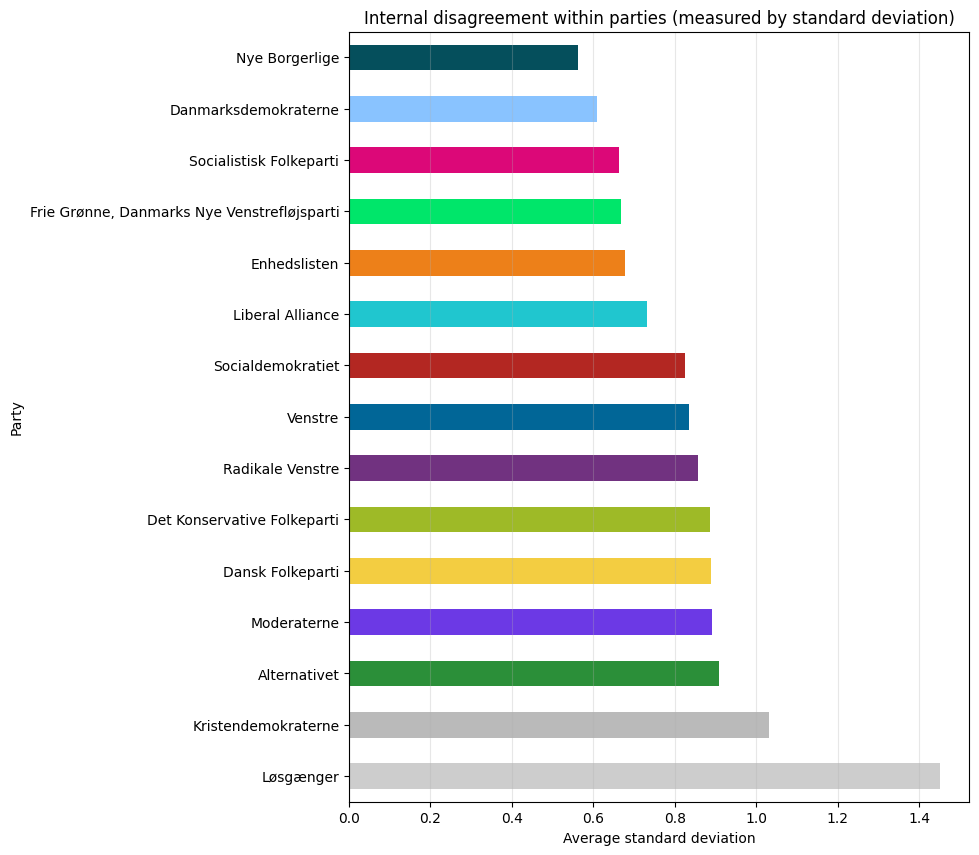

In [70]:
# Intra-party analysis

# calculating the standard deviation for each question within each party
party_std = alldata.groupby('parti')[question_cols].std()

# calculating avreage standard deviation per party
party_std_mean = party_std.mean(axis=1).sort_values(ascending=False)

# plotting results
plt.figure(figsize=(8,10))

party_std_mean.plot.barh(color=[parties_w_color.get(p, "#777777") for p in party_std_mean.index])

plt.title('Internal disagreement within parties (measured by standard deviation)')
plt.xlabel('Average standard deviation')
plt.ylabel('Party')
plt.grid(axis='x', alpha=0.3)
plt.show()



### Intra-party analysis: Internal disagreements

The bar chart illustrates internal disagreements within each political party, measured as the average standard deviation of candidate responses:

- **Greatest internal disagreement:** *Løsgænger* (independent candidates) and *Kristendemokraterne* exhibit the largest internal variations, indicating that candidates within these groups often hold significantly differing views. The considerable disagreement among *Løsgængere* makes sense, as these candidates represent individual positions rather than a unified party stance.

- **Greatest internal agreement:** *Nye Borgerlige*, *Danmarksdemokraterne*, and *Socialistisk Folkeparti* have the smallest internal disagreements, reflecting a high level of consistency among their candidates' political positions.

Overall, the analysis reveals that parties differ notably not only in their political positions but also in their degree of internal unity regarding key issues.


In [77]:
# Creating classification models, which predicts based 
# on the candidate answers where they belong politically

# Extracting all features
X = alldata[question_cols]

# Extracting targets (party names)
y = alldata['parti']

# Dividing data set into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# checking dimensions
X_train.shape, X_test.shape

((606, 49), (261, 49))

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbt_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbt = gbt_model.predict(X_test)


# Evaluate accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosted Tree Accuracy:", accuracy_score(y_test, y_pred_gbt))

# Print classification reports 
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("\nGradient Boosted Tree Report:\n", classification_report(y_test, y_pred_gbt, zero_division=0))

Decision Tree Accuracy: 0.7624521072796935
Random Forest Accuracy: 0.9233716475095786
Gradient Boosted Tree Accuracy: 0.8467432950191571

Decision Tree Report:
                                              precision    recall  f1-score   support

                               Alternativet       0.59      0.65      0.62        20
                       Danmarksdemokraterne       0.83      0.91      0.87        11
                           Dansk Folkeparti       0.92      0.80      0.86        15
                Det Konservative Folkeparti       0.72      0.70      0.71        30
                               Enhedslisten       0.81      0.95      0.88        22
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.71      0.62      0.67         8
                        Kristendemokraterne       1.00      0.46      0.63        13
                           Liberal Alliance       0.73      0.90      0.81        21
                                  Løsgænger       0.00      0.00      0.0

### Model performance summary

#### **Overall accuracy**
- **Random Forest (92.3%)** performed best, classifying most candidates correctly.
- **Gradient Boosted Tree (84.7%)** showed strong performance but struggled with smaller parties.
- **Decision Tree (76.2%)** had the lowest accuracy, frequently misclassifying candidates.

#### **Precision, Recall, and F1-score analysis**
- **Random Forest:**  
  - High **precision** across all major parties, meaning fewer false positives.
  - Strong **recall**, indicating that most candidates were correctly classified.
  - Balanced **F1-score**, showing consistent performance.
- **Gradient Boosted Tree:**  
  - Good overall **precision**, but lower recall for smaller parties.
  - Lower **F1-score** for *Frie Grønne* and *Løsgængere*, indicating difficulty in classifying them.
- **Decision Tree:**  
  - Lower **precision** and **recall**, meaning more false positives and false negatives.
  - The weakest **F1-score**, highlighting inconsistent classifications.

#### **Conclusion**
- **Random Forest is the most reliable model**, offering the best balance between precision, recall, and F1-score.
- **Decision Tree is too simplistic**, leading to frequent misclassifications.
- **Gradient Boosted Tree is a strong alternative**, but its performance varies depending on party size and representation.


In [ ]:
# Identify candidates who were classified into the "wrong" party

# Reconstruct the test dataset with candidates' names and actual party affiliations
alldata_test = alldata.iloc[y_test.index].copy()

# Adding the predictions from the Random Forrest Tree Model, who had the best results
alldata_test['predicted_party'] = y_pred_rf  

# Find candidates where the model predicted a different party than their actual affiliation
misclassified = alldata_test[alldata_test['parti'] != alldata_test['predicted_party']]

# Display misclassified candidates
display(misclassified[['navn', 'parti', 'predicted_party']])



,navn,parti,predicted_party
8,Chresten H. Ibsen,Løsgænger,Radikale Venstre
15,Rasmus Bøgh Vinther,Enhedslisten,Alternativet
519,Kasper B. Mundt,Venstre,Nye Borgerlige
139,Linea Søgaard-Lidell,Venstre,Det Konservative Folkeparti
823,Esben Frette Johnsen,Kristendemokraterne,Radikale Venstre
816,Lars Prier,Dansk Folkeparti,Det Konservative Folkeparti
42,Ali Khatib,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
43,Sara Hvidbak Grouleff,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
433,Rishi Balachandran,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten
326,Diana-Ester Eriksen,Det Konservative Folkeparti,Dansk Folkeparti


### Misclassified candidates analysis

The table shows candidates that the **Random Forest model** incorrectly classified into another party. Key observations:

- **Frequent misclassifications within ideologically similar parties:**
  - *Frie Grønne* candidates were often predicted as *Alternativet* or *Enhedslisten*.
  - *Venstre* candidates were sometimes classified as *Det Konservative Folkeparti* or *Nye Borgerlige*.
  - *Kristendemokraterne* candidates were misclassified as *Radikale Venstre*.

- **Notable individual misclassifications:**
  - *Nicklas Gjedsig Larsen* (Alternativet → Socialdemokratiet) suggests a more moderate stance.
  - *Nikoline Prehn* (Socialdemokratiet → Socialistisk Folkeparti) aligns with the parties' historical proximity.

**Conclusion:**  
The model primarily struggles with **distinguishing closely aligned parties**, and some candidates may have more atypical political positions for their party.
